# An example of how to test our IForestASD Implementation & Compare the two versions of IForestASD regarding the drift detection (IForestASD ADWIN VS IForestASD AnomalyRate)

L'objectif est de voir comment ADWIN IForestASD se positionne par rapport à IForestASD suivant différents jeux de données simulés.

Vu le caractère aléatoire des deux méthodes, pour chaque jeu de données, on fait un certain nombre d'exécution avec les mêmes paramètres et la moyenne des résultats est donc consignée avec la variance.

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [4]:
#************************ Execution settings *******************************
#window_sizes = [50, 100, 500, 1000]
#n_estimators = [30, 50, 100]
window = 100 # Number of sample in one window, window size.
n_estimator = 30 # Number of itree in the random forest
execution_number = 2 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 400 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_number = round((max_sample/window),0) # The number of window to save on .csv file


## Execution Function

In [5]:
def execute_comparision():
    print("")
    print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
    func.run_IForestASD_comparison(execution_number=execution_number, stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)

## Applied On Simple Stream Dataset
### Idea and waitting results
The idea of using a simple stream data whitout anomalies or drift is to test both methods on a neutral environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances
PADWIN take too long time and memory to compute without any better performance than Original IForestASD
It was too long than SADWIN because it had to compute scores and prediction but SADWIN only had to compute scores.
PADWIN and SADWIN were long and memory consumption than Original IForest ASD because they had to compute ADWIN for every instance (score/prediction). And ADWIN also take a time to compute.

### Summary
For this kind of stream which do not contains any real anomaly or any drift, Original IForest is better but only when the user give him the appropriate and real anomaly rate to work.
In the real world, every thing is unsupervised. In unserpervised way, user can not really know the perfect anomaly rate in the stream so IForest ASD way to detect drift have to change.
Here we can not really conclude between Original IForest ASD and ADWIN IForest ASD but SADWIN IForest ASD seems to be better than PADWIN IForest ASD.


Please find the data used on results/Generator_2020-11-21 21:39:02.868591/Generator_2020-11-21 21:39:02.868591_dataUsed.csv

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


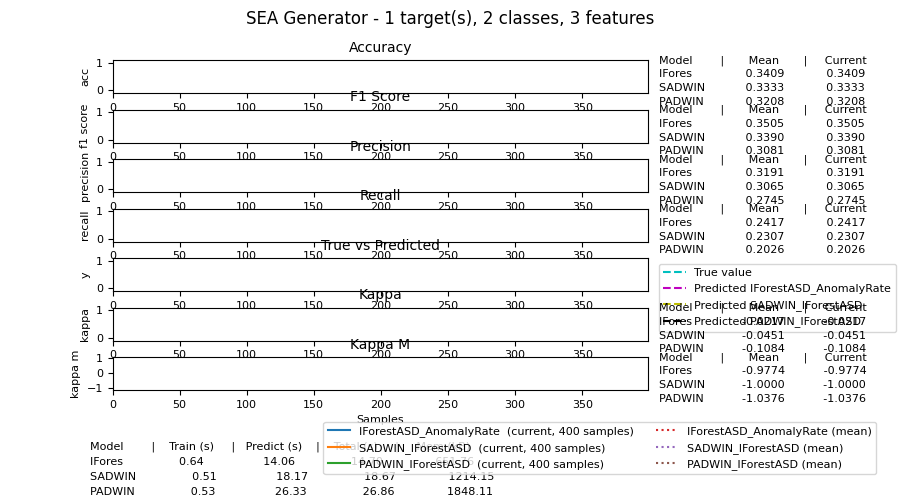

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [14.83s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ###############----- [75%] [33.60s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [60.30s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.3409
IForestASD_AnomalyRate - Kappa        : -0.0217
IForestASD_AnomalyRate - Kappa M      : -0.9774
IForestASD_AnomalyRate - Precision: 0.3191
IForestASD_AnomalyRate - Recall: 0.2417
IForestASD_AnomalyRate - F1 score: 0.3505
IForestASD_AnomalyRate - Training time (s)  : 0.64
IForestASD_AnomalyRate - Testing time  (s)  : 14.06
IForestASD_AnomalyRate - Total time    (s)  : 14.70
IForestASD_AnomalyRate - Size (kB)          : 651.7559
SADWIN_IForestASD - Accuracy     : 0.3333
SADWIN_IForestASD - Kappa        : -0.0451
SADWIN_IForestASD - Kappa M      : -1.0000
SADWIN_I

<IPython.core.display.Javascript object>


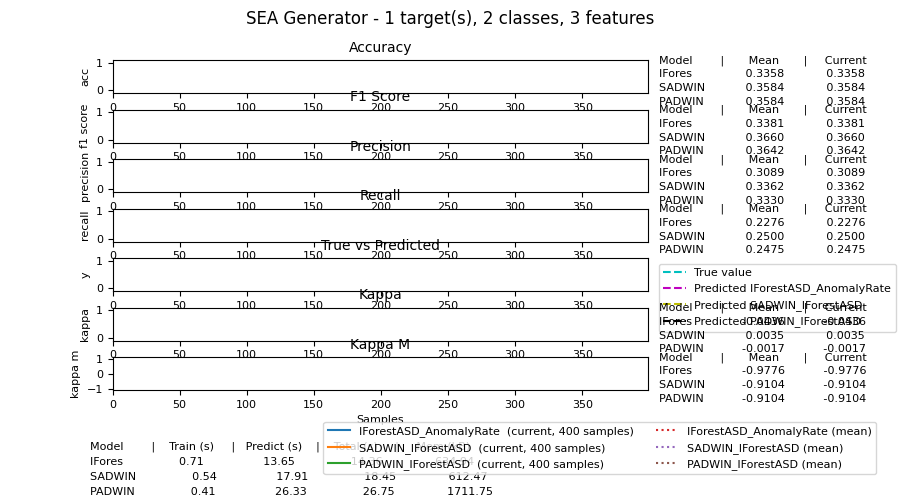

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [14.19s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [37.06s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #################### [100%] [59.63s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.3358
IForestASD_AnomalyRate - Kappa        : -0.0436
IForestASD_AnomalyRate - Kappa M      : -0.9776
IForestASD_AnomalyRate - Precision: 0.3089
IForestASD_AnomalyRate - Recall: 0.2276
IForestASD_AnomalyRate - F1 score: 0.3381
IForestASD_AnomalyRate - Training time (s)  : 0.71
IForestASD_AnomalyRate - Testing time  (s)  : 13.65
IForestASD_AnomalyRate - Total time    (s)  : 14.36
IForestASD_AnomalyRate - Size (kB)          : 634.9434
SADWIN_IForestASD - Accuracy     : 0.3584
SADWIN_IForestASD - Kappa        : 0.0035
SADWIN_IForestASD - Kappa M      : -0.9104
SADWIN_IF

In [6]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Stream data containning anomalies
### Idea and waitting results
The idea of using a stream data with anomalies and without drift is to test both methods on a anomaly environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances

### Summary

In [6]:
dataset_name = "AnomalySineGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
n_samples=10000
anomalies_percentage = 0.1
n_anomalies= int(n_samples*anomalies_percentage)
print(str(n_anomalies))
stream = func.get_anomalies_data_generated(n_samples=n_samples, n_anomalies=n_anomalies, contextual=False,
                 n_contextual=0.0, shift=4, noise=0.1, replace=True, random_state=None)

func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision()

1000

Please find the data used on results/AnomalySineGenerator_2020-11-21 22:19:14.943009/AnomalySineGenerator_2020-11-21 22:19:14.943009_dataUsed.csv

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).


AttributeError: 'NoneType' object has no attribute 'shape'

## Applied On Simple ConceptDrift Stream Dataset

### When drift start one window and is in the window


Please find the data used on results/DriftStreamGenerator_2020-11-21 22:21:46.442608/DriftStreamGenerator_2020-11-21 22:21:46.442608_dataUsed.csv

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


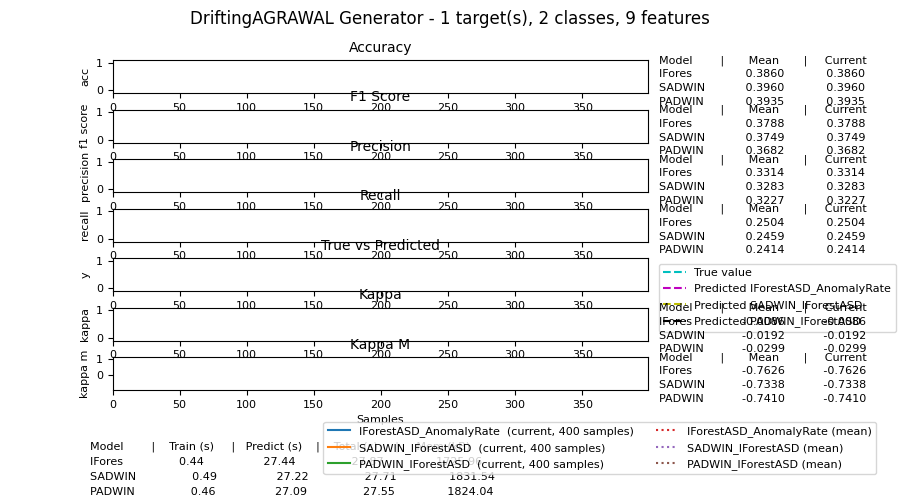

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [14.47s]start AnomalyRate version
start sadwin version
start PADWIN version
 ###############----- [75%] [41.72s]start AnomalyRate version
start sadwin version
start PADWIN version
 #################### [100%] [83.32s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.3860
IForestASD_AnomalyRate - Kappa        : -0.0086
IForestASD_AnomalyRate - Kappa M      : -0.7626
IForestASD_AnomalyRate - Precision: 0.3314
IForestASD_AnomalyRate - Recall: 0.2504
IForestASD_AnomalyRate - F1 score: 0.3788
IForestASD_AnomalyRate - Training time (s)  : 0.44
IForestASD_AnomalyRate - Testing time  (s)  : 27.44
IForestASD_AnomalyRate - Total time    (s)  : 27.87
IForestASD_AnomalyRate - Size (kB)          : 1725.9590
SADWIN_IForestASD - Accuracy     : 0.3960
SADWIN_IForestASD - Kappa        : -0.0192
SADWIN_IForestASD - Kappa M      : -0.7338
SADWIN_IForestASD - Precision: 0.3283
SADWIN_IForestASD - Recall: 0.2459
SADWIN_IForestASD - F1 score: 0.3

<IPython.core.display.Javascript object>


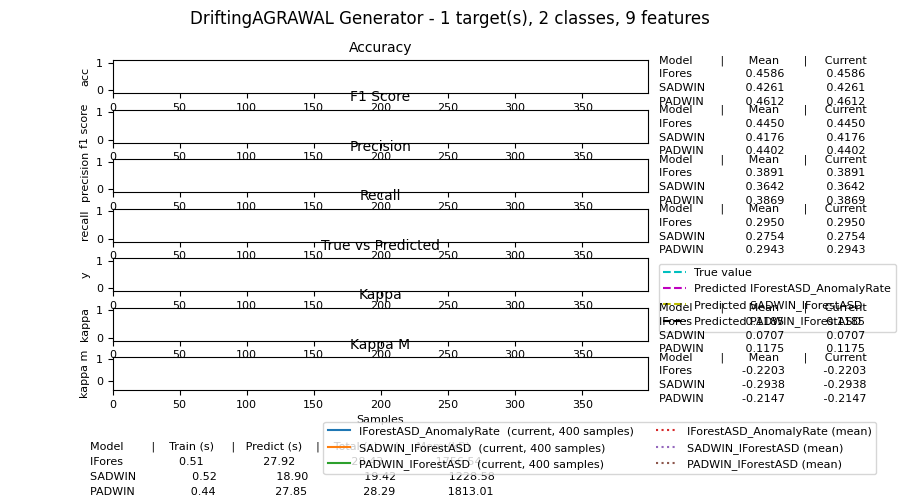

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [15.05s]start AnomalyRate version
start sadwin version

The model was updated by training a new iForest with the version : SADWIN
start PADWIN version
 ###############----- [75%] [39.55s]start AnomalyRate version
start sadwin version
start PADWIN version
 #################### [100%] [76.32s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4586
IForestASD_AnomalyRate - Kappa        : 0.1185
IForestASD_AnomalyRate - Kappa M      : -0.2203
IForestASD_AnomalyRate - Precision: 0.3891
IForestASD_AnomalyRate - Recall: 0.2950
IForestASD_AnomalyRate - F1 score: 0.4450
IForestASD_AnomalyRate - Training time (s)  : 0.51
IForestASD_AnomalyRate - Testing time  (s)  : 27.92
IForestASD_AnomalyRate - Total time    (s)  : 28.43
IForestASD_AnomalyRate - Size (kB)          : 1756.5410
SADWIN_IForestASD - Accuracy     : 0.4261
SADWIN_IForestASD - Kappa        : 0.0707
SADWIN_IForestASD - Kappa M      : -0.2938
SADWIN_IForestASD - Precision: 0.

In [7]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.7
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 100, drift_width = 50, n_num_features = 2, n_cat_features = 0)

func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift is in one window and don't start the window


Please find the data used on results/DriftStreamGenerator_2020-11-21 22:30:30.879870/DriftStreamGenerator_2020-11-21 22:30:30.879870_dataUsed.csv

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


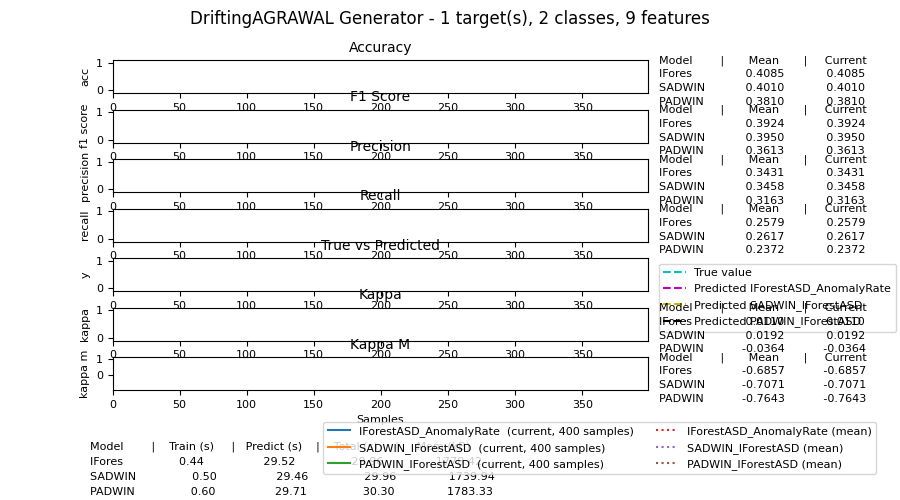

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [16.11s]start AnomalyRate version
start sadwin version
start PADWIN version
 ###############----- [75%] [45.89s]start AnomalyRate version
start sadwin version
start PADWIN version
 #################### [100%] [90.42s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4085
IForestASD_AnomalyRate - Kappa        : 0.0110
IForestASD_AnomalyRate - Kappa M      : -0.6857
IForestASD_AnomalyRate - Precision: 0.3431
IForestASD_AnomalyRate - Recall: 0.2579
IForestASD_AnomalyRate - F1 score: 0.3924
IForestASD_AnomalyRate - Training time (s)  : 0.44
IForestASD_AnomalyRate - Testing time  (s)  : 29.52
IForestASD_AnomalyRate - Total time    (s)  : 29.96
IForestASD_AnomalyRate - Size (kB)          : 1778.4199
SADWIN_IForestASD - Accuracy     : 0.4010
SADWIN_IForestASD - Kappa        : 0.0192
SADWIN_IForestASD - Kappa M      : -0.7071
SADWIN_IForestASD - Precision: 0.3458
SADWIN_IForestASD - Recall: 0.2617
SADWIN_IForestASD - F1 score: 0.395

<IPython.core.display.Javascript object>


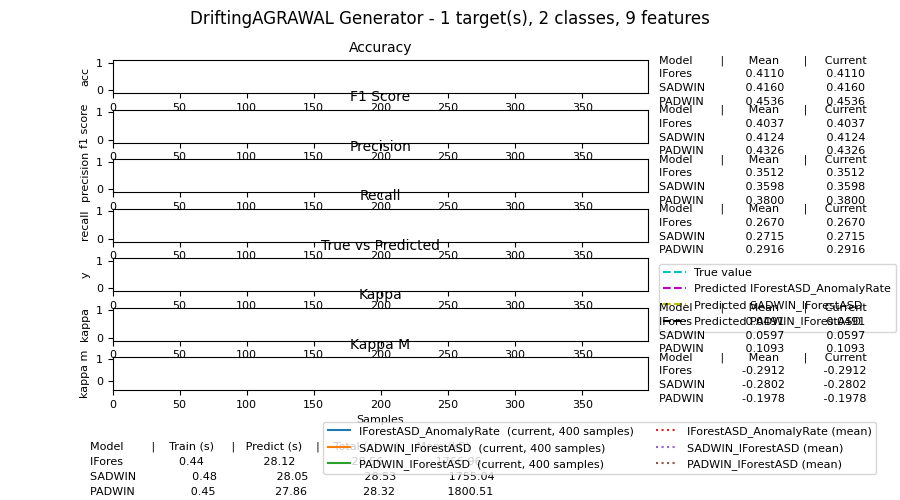

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [15.27s]start AnomalyRate version
start sadwin version
start PADWIN version
 ###############----- [75%] [43.04s]start AnomalyRate version
start sadwin version
start PADWIN version
 #################### [100%] [85.58s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4110
IForestASD_AnomalyRate - Kappa        : 0.0491
IForestASD_AnomalyRate - Kappa M      : -0.2912
IForestASD_AnomalyRate - Precision: 0.3512
IForestASD_AnomalyRate - Recall: 0.2670
IForestASD_AnomalyRate - F1 score: 0.4037
IForestASD_AnomalyRate - Training time (s)  : 0.44
IForestASD_AnomalyRate - Testing time  (s)  : 28.12
IForestASD_AnomalyRate - Total time    (s)  : 28.56
IForestASD_AnomalyRate - Size (kB)          : 1766.9590
SADWIN_IForestASD - Accuracy     : 0.4160
SADWIN_IForestASD - Kappa        : 0.0597
SADWIN_IForestASD - Kappa M      : -0.2802
SADWIN_IForestASD - Precision: 0.3598
SADWIN_IForestASD - Recall: 0.2715
SADWIN_IForestASD - F1 score: 0.412

In [8]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.7
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 110, drift_width = 50, n_num_features = 2, n_cat_features = 0)

func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift don't start a window but is between two windows


Please find the data used on results/DriftStreamGenerator_2020-11-21 22:34:13.533258/DriftStreamGenerator_2020-11-21 22:34:13.533258_dataUsed.csv

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


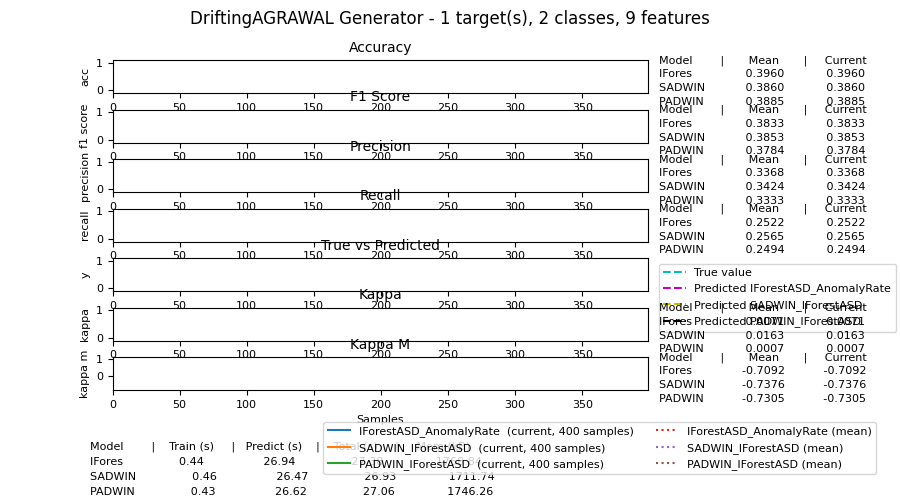

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [14.56s]start AnomalyRate version
start sadwin version
start PADWIN version
 ###############----- [75%] [41.73s]start AnomalyRate version
start sadwin version
start PADWIN version
 #################### [100%] [81.55s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.3960
IForestASD_AnomalyRate - Kappa        : 0.0071
IForestASD_AnomalyRate - Kappa M      : -0.7092
IForestASD_AnomalyRate - Precision: 0.3368
IForestASD_AnomalyRate - Recall: 0.2522
IForestASD_AnomalyRate - F1 score: 0.3833
IForestASD_AnomalyRate - Training time (s)  : 0.44
IForestASD_AnomalyRate - Testing time  (s)  : 26.94
IForestASD_AnomalyRate - Total time    (s)  : 27.38
IForestASD_AnomalyRate - Size (kB)          : 1768.8379
SADWIN_IForestASD - Accuracy     : 0.3860
SADWIN_IForestASD - Kappa        : 0.0163
SADWIN_IForestASD - Kappa M      : -0.7376
SADWIN_IForestASD - Precision: 0.3424
SADWIN_IForestASD - Recall: 0.2565
SADWIN_IForestASD - F1 score: 0.385

<IPython.core.display.Javascript object>


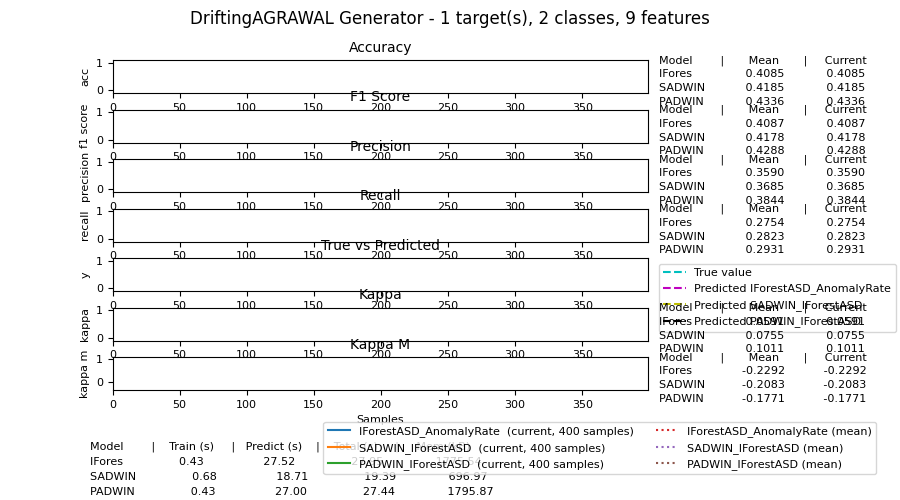

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)


start AnomalyRate version
start sadwin version
start PADWIN version


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [15.91s]start AnomalyRate version
start sadwin version
start PADWIN version
 ###############----- [75%] [44.29s]start AnomalyRate version
start sadwin version

The model was updated by training a new iForest with the version : SADWIN
start PADWIN version
 #################### [100%] [74.96s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4085
IForestASD_AnomalyRate - Kappa        : 0.0591
IForestASD_AnomalyRate - Kappa M      : -0.2292
IForestASD_AnomalyRate - Precision: 0.3590
IForestASD_AnomalyRate - Recall: 0.2754
IForestASD_AnomalyRate - F1 score: 0.4087
IForestASD_AnomalyRate - Training time (s)  : 0.43
IForestASD_AnomalyRate - Testing time  (s)  : 27.52
IForestASD_AnomalyRate - Total time    (s)  : 27.95
IForestASD_AnomalyRate - Size (kB)          : 1775.5449
SADWIN_IForestASD - Accuracy     : 0.4185
SADWIN_IForestASD - Kappa        : 0.0755
SADWIN_IForestASD - Kappa M      : -0.2083
SADWIN_IForestASD - Precision: 0.

In [9]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.7
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 175, drift_width = 50, n_num_features = 2, n_cat_features = 0)

func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

In [57]:
 def merge_file2(folder_path, output_file = 'output.csv'):
    import os
    import pandas as pd
    result = pd.DataFrame()
    result_update = pd.DataFrame()
    result_exec = pd.DataFrame()
    print('List of file merged')
    print()
    no = '.ipynb_checkpoints'
    for file_ in os.listdir(folder_path):
        #print(file_)
        #list.append(file_)
        #print(file_.find("dataUsed"))
        if file_.find("dataUsed") == -1:
            if file_ != no:
                print(file_)
                
                if file_.find("updated_count") != -1:
                    df = pd.read_csv(folder_path+"/"+file_, sep = ',', skiprows=1, header = 0, dtype='unicode', error_bad_lines=False)
                    #df.at[0,'update_'] = df.param.apply(lambda st: st[st.find("WS")+2:st.find("_NE")])[0]
                    if(len(result_update) == 0):
                        result_update = pd.concat([result_update,df], ignore_index=True)
                    else:
                        result_update = pd.concat([result_update,df])
                else:
                    df = pd.read_csv(folder_path+"/"+file_, sep = ',', skiprows=6, header = 0, dtype='unicode', error_bad_lines=False)
                    df.at[0,'param'] = str(file_)
                    #df.at[0,'ExecNumer'] = df.param.apply(lambda st: st[st.find("Number")+6:st.find("_for")])[0]
                    df.at[0,'window'] = df.param.apply(lambda st: st[st.find("WS")+2:st.find("_NE")])[0]
                    df.at[0,'estimators']= df.param.apply(lambda st: st[st.find("NE")+2:st.find("_UP")])[0]
                    #df.at[0,'updates']= df.param.apply(lambda st: st[st.find("UP_")+3:st.find(".csv")])[0]

                 #   result = pd.concat([result,df],ignore_index=True)
                    #result_update = pd.concat([result_update,df]).groupby(['AnomalyRate', 'SADWIN', 'PADWIN']).sum()
                    #if(len(result_exec) == 0):
                    result_exec = pd.concat([result_exec,df], ignore_index=True)
                    #else:
                    #    result_exec = pd.concat([result_update,df])
                        #pd.merge(result_update, df, on=[0]).set_index([0]).sum(axis=1)
    print(result_update)
    print(result_exec)
    #result.sort_values(by = ['window', 'estimators'], inplace= True)
    #result.columns=df.columns
    #output_file = 'RESULT_SHUTTLE10K.csv'
    #result.to_csv(output_file,index=False)
    
    return result

In [58]:
merge_file2("results/DriftStreamGenerator_2020-11-21 22:34:13.533258", output_file = 'output.csv')

List of file merged

result_Number0_for_WS100_NE30.csv


AttributeError: 'float' object has no attribute 'find'